## 探索电影数据集

在这个项目中，你将尝试使用所学的知识，使用 `NumPy`、`Pandas`、`matplotlib`、`seaborn` 库中的函数，来对电影数据集进行探索。

下载数据集：
[TMDb电影数据](https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/explore+dataset/tmdb-movies.csv)



数据集各列名称的含义：
<table>
<thead><tr><th>列名称</th><th>id</th><th>imdb_id</th><th>popularity</th><th>budget</th><th>revenue</th><th>original_title</th><th>cast</th><th>homepage</th><th>director</th><th>tagline</th><th>keywords</th><th>overview</th><th>runtime</th><th>genres</th><th>production_companies</th><th>release_date</th><th>vote_count</th><th>vote_average</th><th>release_year</th><th>budget_adj</th><th>revenue_adj</th></tr></thead><tbody>
 <tr><td>含义</td><td>编号</td><td>IMDB 编号</td><td>知名度</td><td>预算</td><td>票房</td><td>名称</td><td>主演</td><td>网站</td><td>导演</td><td>宣传词</td><td>关键词</td><td>简介</td><td>时常</td><td>类别</td><td>发行公司</td><td>发行日期</td><td>投票总数</td><td>投票均值</td><td>发行年份</td><td>预算（调整后）</td><td>票房（调整后）</td></tr>
</tbody></table>


**请注意，你需要提交该报告导出的 `.html`、`.ipynb` 以及 `.py` 文件。**



---

---

## 第一节 数据的导入与处理

在这一部分，你需要编写代码，使用 Pandas 读取数据，并进行预处理。


**任务1.1：** 导入库以及数据

1. 载入需要的库 `NumPy`、`Pandas`、`matplotlib`、`seaborn`。
2. 利用 `Pandas` 库，读取 `tmdb-movies.csv` 中的数据，保存为 `movie_data`。

提示：记得使用 notebook 中的魔法指令 `%matplotlib inline`，否则会导致你接下来无法打印出图像。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

movie_data = pd.read_csv("tmdb-movies.csv")
%matplotlib inline

---

**任务1.2: ** 了解数据

你会接触到各种各样的数据表，因此在读取之后，我们有必要通过一些简单的方法，来了解我们数据表是什么样子的。

1. 获取数据表的行列，并打印。
2. 使用 `.head()`、`.tail()`、`.sample()` 方法，观察、了解数据表的情况。
3. 使用 `.dtypes` 属性，来查看各列数据的数据类型。
4. 使用 `isnull()` 配合 `.any()` 等方法，来查看各列是否存在空值。
5. 使用 `.describe()` 方法，看看数据表中数值型的数据是怎么分布的。



In [2]:
for item in movie_data.columns:
    print(item, ':', movie_data[item].dtype)
print(movie_data.all())
print(movie_data.isnull().any())
print(movie_data.describe())

id : int64
imdb_id : object
popularity : float64
budget : int64
revenue : int64
original_title : object
cast : object
homepage : object
director : object
tagline : object
keywords : object
overview : object
runtime : int64
genres : object
production_companies : object
release_date : object
vote_count : int64
vote_average : float64
release_year : int64
budget_adj : float64
revenue_adj : float64
id                       True
imdb_id                  True
popularity               True
budget                  False
revenue                 False
original_title           True
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date             True
vote_count               True
vote_average             True
release_year             True
budget_adj              False
rev

---

**任务1.3: ** 清理数据

在真实的工作场景中，数据处理往往是最为费时费力的环节。但是幸运的是，我们提供给大家的 tmdb 数据集非常的「干净」，不需要大家做特别多的数据清洗以及处理工作。在这一步中，你的核心的工作主要是对数据表中的空值进行处理。你可以使用 `.fillna()` 来填补空值，当然也可以使用 `.dropna()` 来丢弃数据表中包含空值的某些行或者列。

任务：使用适当的方法来清理空值，并将得到的数据保存。

In [3]:
movie_data.drop(['homepage', 'tagline', 'keywords', 'production_companies'], axis=1, inplace = True)
movie_data.dropna(inplace = True)
movie_data.to_csv("tmdb-movies-adjusted.csv")

movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


---

---

## 第二节 根据指定要求读取数据


相比 Excel 等数据分析软件，Pandas 的一大特长在于，能够轻松地基于复杂的逻辑选择合适的数据。因此，如何根据指定的要求，从数据表当获取适当的数据，是使用 Pandas 中非常重要的技能，也是本节重点考察大家的内容。



---

**任务2.1: ** 简单读取

1. 读取数据表中名为 `id`、`popularity`、`budget`、`runtime`、`vote_average` 列的数据。
2. 读取数据表中前1～20行以及48、49行的数据。
3. 读取数据表中第50～60行的 `popularity` 那一列的数据。

要求：每一个语句只能用一行代码实现。

In [4]:
movie_data[['id', 'budget', 'runtime', 'vote_average']]

movie_data.iloc[list(range(0, 20))+[47,48]]

movie_data['popularity'].iloc[49:59]

49    2.885126
50    2.883233
51    2.814802
52    2.798017
53    2.793297
54    2.614499
55    2.584264
56    2.578919
57    2.575711
58    2.557859
Name: popularity, dtype: float64

---

**任务2.2: **逻辑读取（Logical Indexing）

1. 读取数据表中 **`popularity` 大于5** 的所有数据。
2. 读取数据表中 **`popularity` 大于5** 的所有数据且**发行年份在1996年之后**的所有数据。

提示：Pandas 中的逻辑运算符如 `&`、`|`，分别代表`且`以及`或`。

要求：请使用 Logical Indexing实现。

In [5]:
movie_data[movie_data['popularity'] > 5]

movie_data[(movie_data['popularity'] > 5) & (movie_data['release_year'] > 1996)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


---

**任务2.3: **分组读取

1. 对 `release_year` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `revenue` 的均值。
2. 对 `director` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `popularity` 的均值，从高到低排列。

要求：使用 `Groupby` 命令实现。

In [6]:
avg_revenue = movie_data.groupby(['release_year']).agg(np.mean)['revenue']
print (avg_revenue)
avg_popularity = movie_data.groupby(['director']).agg(np.mean)['popularity'].sort_values(ascending = False)
print (avg_popularity)

release_year
1960    4.531406e+06
1961    1.089420e+07
1962    6.736870e+06
1963    5.511911e+06
1964    8.118614e+06
1965    1.308805e+07
1966    1.842102e+06
1967    1.941670e+07
1968    6.966657e+06
1969    8.131903e+06
1970    1.400555e+07
1971    7.362011e+06
1972    1.236825e+07
1973    2.225420e+07
1974    1.766391e+07
1975    2.176114e+07
1976    1.704267e+07
1977    3.893898e+07
1978    2.107353e+07
1979    2.955781e+07
1980    2.267516e+07
1981    2.164154e+07
1982    3.035116e+07
1983    2.884412e+07
1984    2.534158e+07
1985    2.662752e+07
1986    2.502315e+07
1987    2.792020e+07
1988    2.633072e+07
1989    3.825869e+07
1990    4.026641e+07
1991    3.538797e+07
1992    4.604662e+07
1993    3.929464e+07
1994    3.856212e+07
1995    5.262265e+07
1996    4.094331e+07
1997    5.578625e+07
1998    4.520559e+07
1999    5.069515e+07
2000    4.901206e+07
2001    5.564350e+07
2002    5.546820e+07
2003    5.387275e+07
2004    5.470301e+07
2005    4.575301e+07
2006    4.028648e+07


---

---

## 第三节 绘图与可视化

接着你要尝试对你的数据进行图像的绘制以及可视化。这一节最重要的是，你能够选择合适的图像，对特定的可视化目标进行可视化。所谓可视化的目标，是你希望从可视化的过程中，观察到怎样的信息以及变化。例如，观察票房随着时间的变化、哪个导演最受欢迎等。

<table>
<thead><tr><th>可视化的目标</th><th>可以使用的图像</th></tr></thead><tbody>
 <tr><td>表示某一属性数据的分布</td><td>饼图、直方图、散点图</td></tr>
 <tr><td>表示某一属性数据随着某一个变量变化</td><td>条形图、折线图、热力图</td></tr>
 <tr><td>比较多个属性的数据之间的关系</td><td>散点图、小提琴图、堆积条形图、堆积折线图</td></tr>
</tbody></table>

在这个部分，你需要根据题目中问题，选择适当的可视化图像进行绘制，并进行相应的分析。对于选做题，他们具有一定的难度，你可以尝试挑战一下～

**任务3.1：**对 `popularity` 最高的20名电影绘制其 `popularity` 值。

Text(0,0.5,'Popularity')

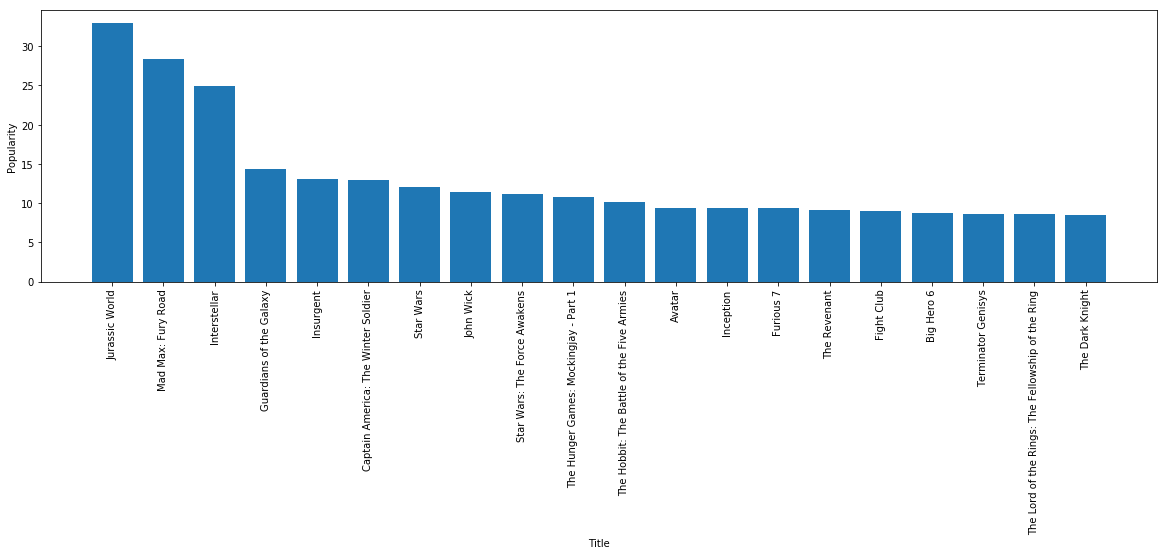

In [7]:
popularity_top_20_index = movie_data['popularity'].sort_values(ascending = False).index[:20]
popularity_top_20_data = movie_data.loc[popularity_top_20_index]

plt.figure(figsize = [20, 5])

plt.bar(x = popularity_top_20_data['original_title'], height = popularity_top_20_data['popularity'])
plt.xticks(rotation = 90)
plt.xlabel("Title")
plt.ylabel("Popularity")

---
**任务3.2：**分析电影净利润（票房-成本）随着年份变化的情况，并简单进行分析。

([<matplotlib.axis.XTick at 0x1a25134780>,
 <a list of 58 Text xticklabel objects>)

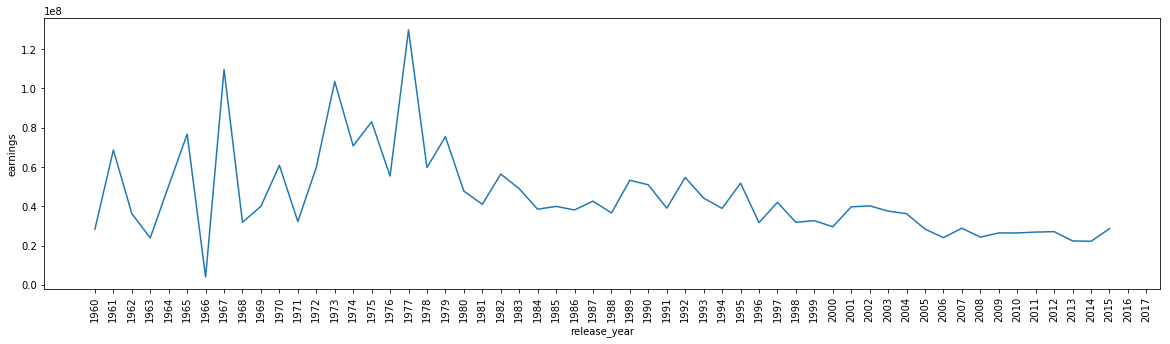

In [8]:
movie_data['earnings'] = movie_data['revenue_adj'] - movie_data['budget_adj']
avg_earnings = movie_data.groupby(['release_year']).agg(np.mean)['earnings']
avg_earnings = avg_earnings.to_frame()
avg_earnings.reset_index('release_year',inplace = True)

plt.figure(figsize = [20, 5])
plt.errorbar(data = avg_earnings, x = 'release_year',y = 'earnings')
plt.xlabel("release_year")
plt.ylabel("earnings")
plt.xticks(np.arange(1960,2018), rotation=90)

*电影平均净利润在1960-1980年间起伏大且较高.1981年起较低但平稳.*

---

**[选做]任务3.3：**选择最多产的10位导演（电影数量最多的），绘制他们排行前3的三部电影的票房情况，并简要进行分析。

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

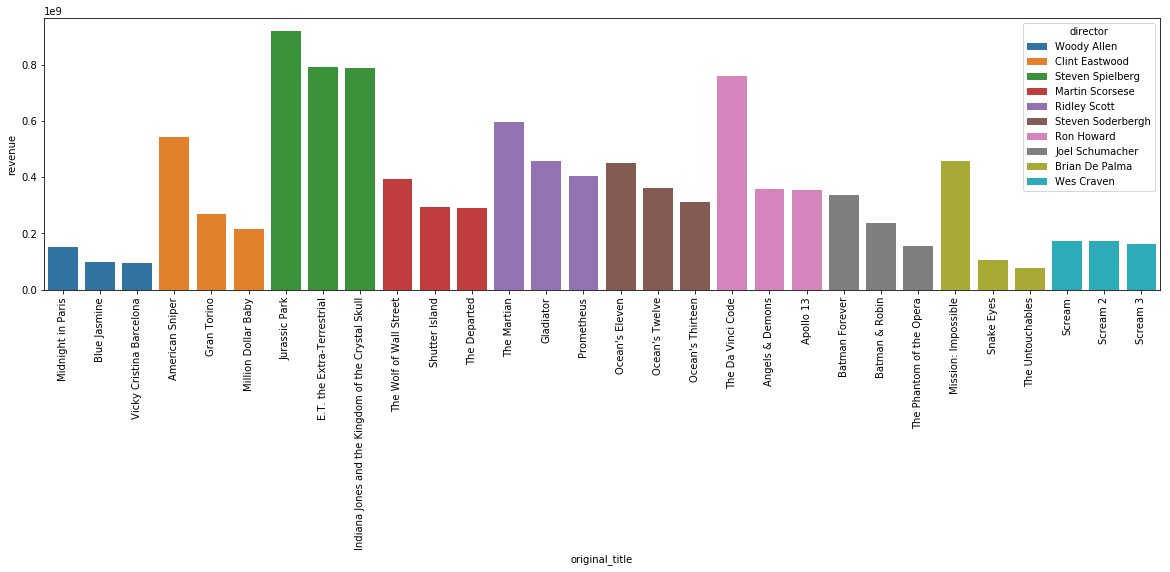

In [9]:
director_top_10_index = movie_data.groupby('director').agg('count')['original_title'].sort_values(ascending = False)[:10].index
director_top_10_data = movie_data[['director', 'original_title', 'revenue']].set_index('director').loc[director_top_10_index]

director_top_10_data_sorted = pd.DataFrame(columns=('director', 'original_title', 'revenue'))

for director in director_top_10_index:
    director_top_10_data_sorted = director_top_10_data_sorted.append(director_top_10_data.loc[director].sort_values(by = 'revenue', ascending = False)[:3].reset_index(), sort=False)
director_top_10_data_sorted

plt.figure(figsize = [20, 5])
sb.barplot(data = director_top_10_data_sorted, x = 'original_title', y = 'revenue', hue='director', dodge=False)
plt.xticks(rotation=90)

---

**[选做]任务3.4：**分析1968年~2015年六月电影的数量的变化。

Text(0,0.5,'count')

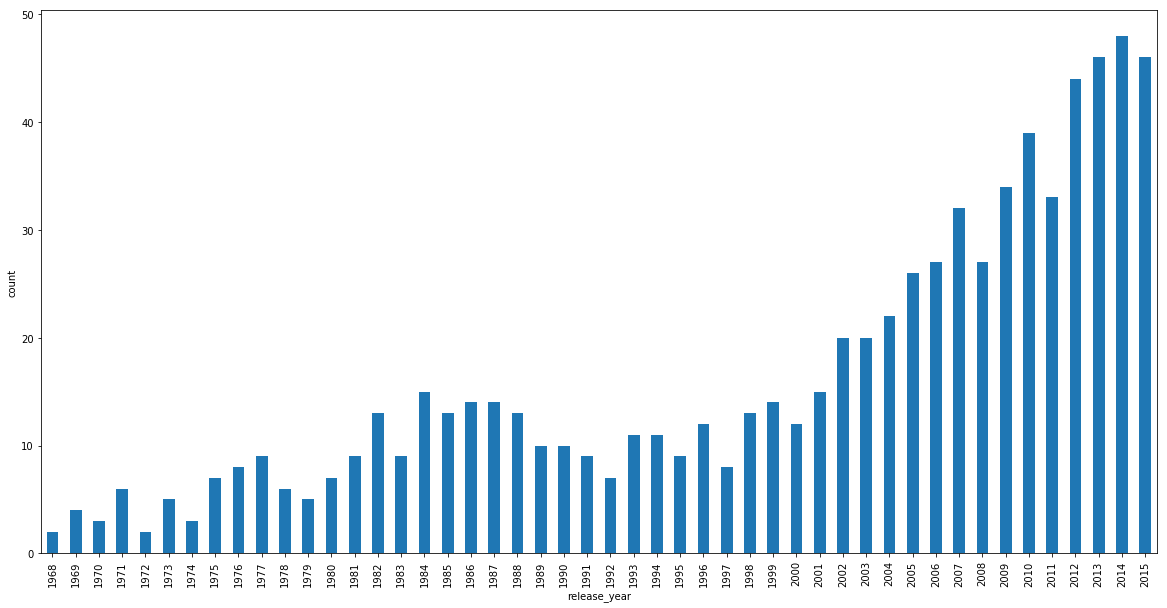

In [10]:
# 筛选条件1 年份
sel_year = movie_data['release_year'].between(1968,2015)

# 筛选条件2 六月
movie_data['month'] = pd.to_datetime(movie_data['release_date']).dt.month
sel_June = movie_data['month'].between(6, 6)

# 筛选数据并作图
base_color = sb.color_palette()[0]
movie_data[sel_year&sel_June]['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(20, 10), color = base_color)
plt.xlabel('release_year')
plt.ylabel('count')

---

**[选做]任务3.5：**分析1968年~2015年六月电影 `Comedy` 和 `Drama` 两类电影的数量的变化。

/Users/y1.han/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/y1.han/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0,0.5,'count')

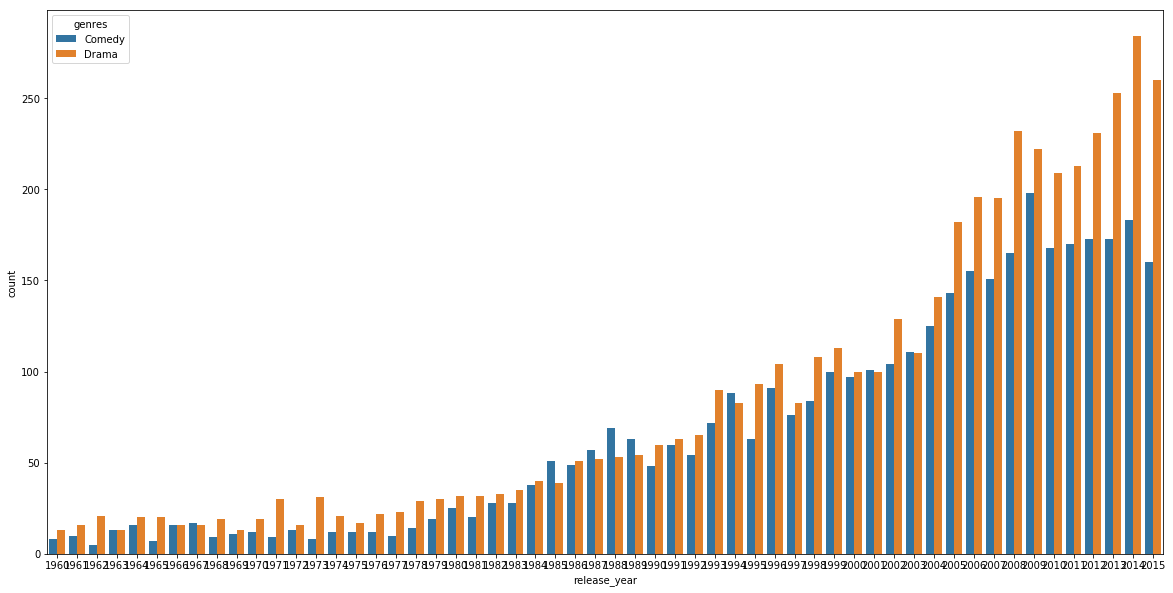

In [11]:
movie_data_comedy = movie_data[movie_data['genres'].str.contains('Comedy')]
movie_data_comedy['genres'] = 'Comedy'

movie_data_drama = movie_data[movie_data['genres'].str.contains('Drama')]
movie_data_drama['genres'] = 'Drama'

movie_data_both = pd.concat([movie_data_comedy, movie_data_drama])

plt.figure(figsize = [20, 10])
sb.countplot(data = movie_data_both, x = 'release_year', hue = 'genres')
plt.xlabel("release_year")
plt.ylabel("count")

> 注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)、Python (.py)** 把导出的 HTML、python文件 和这个 iPython notebook 一起提交给审阅者。